# **Curso Python: Ejercicios semana 03**

### **12_Linear_regression**

>**Perform linear regressions of salinity vs temperature and dec vs salinity**

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np
linear_r = pd.read_csv("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")
linear_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

- **Salinidad vs Temperatura**

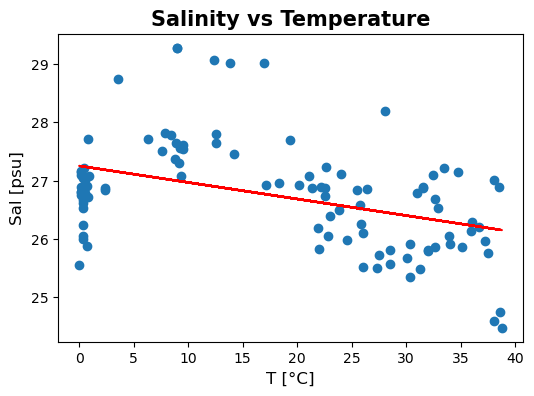

Slope: -0.028458717486946162


In [42]:
# REGRESIÓN LINEAL SIMPLE
x1 = linear_r['sal_psu']
y1 = linear_r['temp_c']
plt.scatter(x1, y1, label='original data')
plt.xlabel('T [°C]', fontsize = 12, )
plt.ylabel('Sal [psu]', fontsize = 12)
plt.title("Salinity vs Temperature", fontsize=15, fontweight='bold')
# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
# Plot linear regression 
plt.plot(x1, intercept + slope*x1, 'r', label='fitted line')
# set the figure size
plt.gcf().set_size_inches(6, 4)
# save the plot as a PDF file paper format 
folder_resultados = 'folder_resultados'
os.makedirs(folder_resultados, exist_ok=True)
plt.savefig(os.path.join(folder_resultados, 'Sal_T_regrlin.pdf'), dpi=300, bbox_inches='tight')
plt.show()
print('Slope:', slope)

In [43]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.17749929096684752
p_value: 6.879907520531154e-06
slope: -0.028458717486946162
intercept: 27.25200067150795


In [44]:
# REGRESIÓN OLS
x1 = linear_r['sal_psu']
y2 = linear_r['temp_c']
x1 = sm.add_constant(x1)
# Fit the Ordinary2 Least Squares (OLS) linear regression model
model = sm.OLS(y2, x1).fit()
# Display2 the model summary2
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.170   
Dependent Variable: temp_c           AIC:                264.7839
Date:               2025-08-26 15:24 BIC:                270.1108
No. Observations:   106              Log-Likelihood:     -130.39 
Df Model:           1                F-statistic:        22.44   
Df Residuals:       104              Prob (F-statistic): 6.88e-06
R-squared:          0.177            Scale:              0.69865 
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
const        27.2520    0.1320  206.4122  0.0000  26.9902  27.5138
sal_psu      -0.0285    0.0060   -4.7375  0.0000  -0.0404  -0.0165
-----------------------------------------------------------------
Omnibus:              10.808       Durbin-Watson:          0.642 
Prob(Omnibus):        

In [45]:
print("\n=== MODEL INTERPRETATION ===\n")
# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model.")
print(f"R² = {r2:.3f}\n{fit_quality}")
# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor
print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")
# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")
# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.177
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 27.2520, p = 0.0000 → ✔️ Significant (p < 0.05)
- sal_psu: Coef = -0.0285, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (sal_psu): -0.0285, p = 0.0000 → ✔️ Significant

Standard Error of the model: 0.8359


- **DIC vs Salinidad**

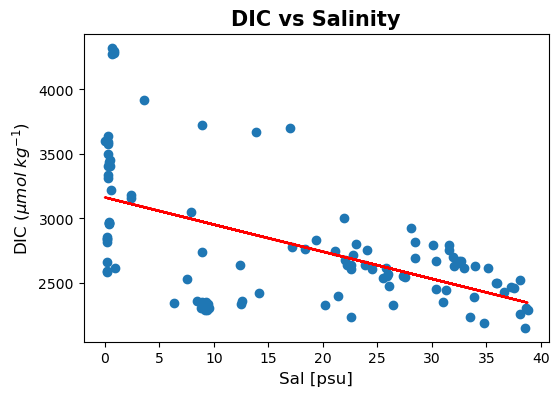

Slope: -21.053197646779633


In [46]:
# REGRESIÓN LINEAL SIMPLE
x2 = linear_r['sal_psu']
y2 = linear_r['dic_micromol_kg']
plt.scatter(x2, y2, label='original data')
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.xlabel('Sal [psu]', fontsize = 12)
plt.title("DIC vs Salinity", fontsize=15, fontweight='bold')
# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
# Plot linear regression 
plt.plot(x2, intercept + slope*x2, 'r', label='fitted line')
# set the figure size
plt.gcf().set_size_inches(6, 4)
# save the plot as a PDF file paper format 
folder_resultados = 'folder_resultados'
os.makedirs(folder_resultados, exist_ok=True)
plt.savefig(os.path.join(folder_resultados, 'DIC_Sal_regrlin.pdf'), dpi=300, bbox_inches='tight')
plt.show()
print('Slope:', slope)

In [47]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.32710473310227767
p_value: 1.51441040237653e-10
slope: -21.053197646779633
intercept: 3162.874756459312


In [48]:
# REGRESIÓN OLS
y2 = linear_r['dic_micromol_kg']
x2 = linear_r['sal_psu']
x2 = sm.add_constant(x2)
#Fit the Ordinary2 Ly2st Squares (OLS) linear regression model
model = sm.OLS(y2, x2).fit()
# Display2 the modey2summary2
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.321     
Dependent Variable: dic_micromol_kg  AIC:                1579.2510 
Date:               2025-08-26 15:24 BIC:                1584.5779 
No. Observations:   106              Log-Likelihood:     -787.63   
Df Model:           1                F-statistic:        50.56     
Df Residuals:       104              Prob (F-statistic): 1.51e-10  
R-squared:          0.327            Scale:              1.6974e+05
--------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
const     3162.8748   65.0768  48.6022  0.0000  3033.8250  3291.9245
sal_psu    -21.0532    2.9610  -7.1103  0.0000   -26.9249   -15.1815
-------------------------------------------------------------------
Omnibus:              10.933        Durbin-Watson:           

In [49]:
print("\n=== MODEL INTERPRETATION ===\n")
# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model.")
print(f"R² = {r2:.3f}\n{fit_quality}")
# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor
print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")
# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")
# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.327
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 3162.8748, p = 0.0000 → ✔️ Significant (p < 0.05)
- sal_psu: Coef = -21.0532, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (sal_psu): -21.0532, p = 0.0000 → ✔️ Significant

Standard Error of the model: 411.9965


### **13_spearman_correlation**

>**Create a function to compute the Pearson correlation**

In [3]:
import seaborn as sns
pearson_corr = pd.read_csv("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [17]:
#MÉTODO 1: FUNCIÓN
def pearson_correlation(x, y):
    # Convertir a arrays numpy
    x = np.array(x)
    y = np.array(y)
    # Verificar que tengan la misma longitud
    if len(x) != len(y):
        raise ValueError("Los arrays deben tener la misma longitud")
    # Calcular medias
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    # Calcular numerador: sum((x - mean_x) * (y - mean_y))
    numerator = np.sum((x - mean_x) * (y - mean_y))
    # Calcular denominador: sqrt(sum((x - mean_x)^2) * sum((y - mean_y)^2))
    denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))
    # Evitar división por cero
    if denominator == 0:
        return 0
    # Calcular correlación
    correlation = numerator / denominator
    return correlation
correlation = pearson_correlation(pearson_corr['sal_psu'].values,pearson_corr['temp_c'].values)
print("Pearson Correlation")
print(f"result correlation salinity vs tempepature: {correlation:.4f}")

Pearson Correlation
result correlation salinity vs tempepature: -0.4213


In [18]:
#MÉTODO 2: NUMPY FUNCIÓN
def pearson_correlation_numpy(x, y):
    return np.corrcoef(x, y)[0, 1]
correlation = pearson_correlation_numpy(pearson_corr['sal_psu'].values,pearson_corr['temp_c'].values)
print("Pearson Correlation")
print(f"result correlation salinity vs tempepature: {correlation:.4f}")

Pearson Correlation
result correlation salinity vs tempepature: -0.4213


### **Clustering**

> **Change the number of clusters to 4 and plot the dendrogram again**

In [32]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
cluster_df = pd.read_csv("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [35]:
def preprocess_data(df, variables):
    df_clean = df.dropna(subset=variables)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean[variables])
    return df_clean, X_scaled
def perform_hierarchical_clustering(X_scaled, method='ward', n_clusters=4):
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4):
    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix,labels=labels,above_threshold_color='gray')
    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

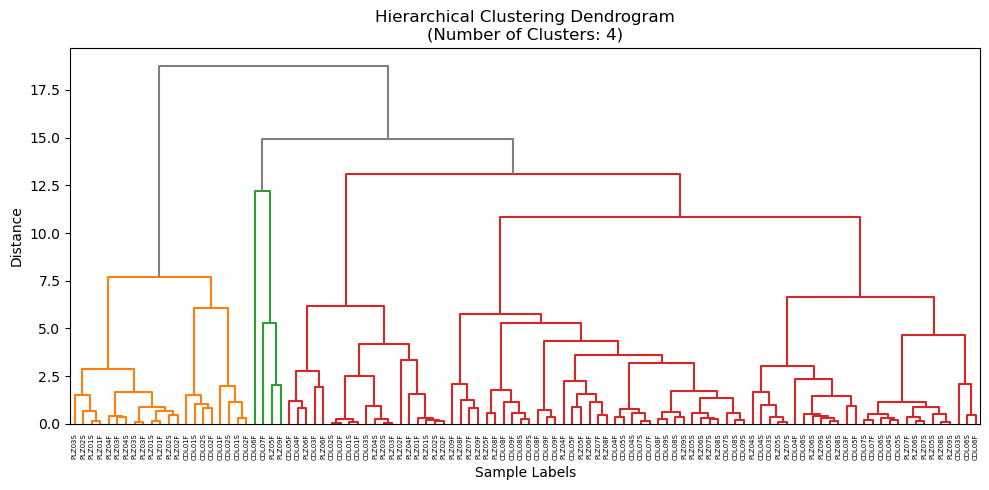

In [36]:
# Main workflow
# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']
# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(cluster_df, selected_vars)
# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=4)
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters
# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)

>**Try different hierarchical clustering methods**

- **Single**

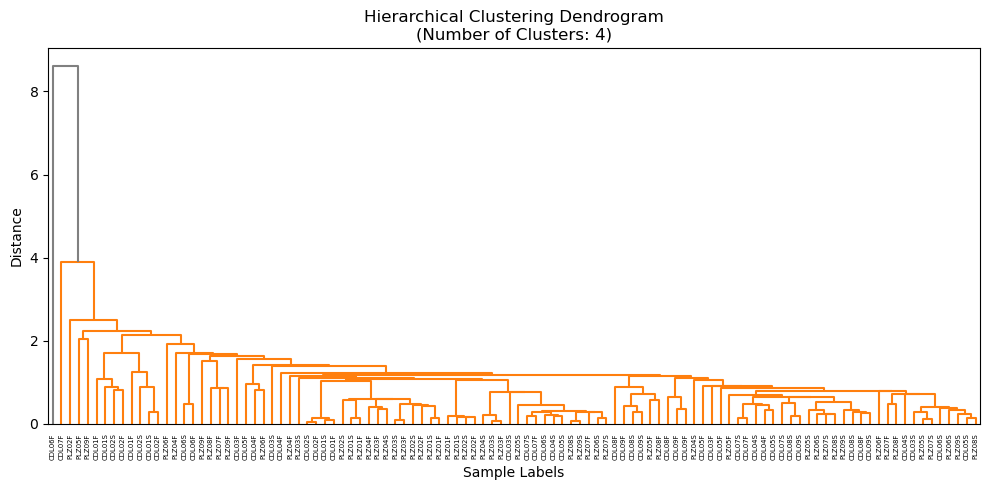

In [37]:
def preprocess_data(df, variables):
    df_clean = df.dropna(subset=variables)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean[variables])
    return df_clean, X_scaled
def perform_hierarchical_clustering(X_scaled, method='single', n_clusters=4):
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4):
    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix,labels=labels,above_threshold_color='gray')
    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()
    # Main workflow
# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']
# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(cluster_df, selected_vars)
# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=4)
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters
# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)

- **Complete**

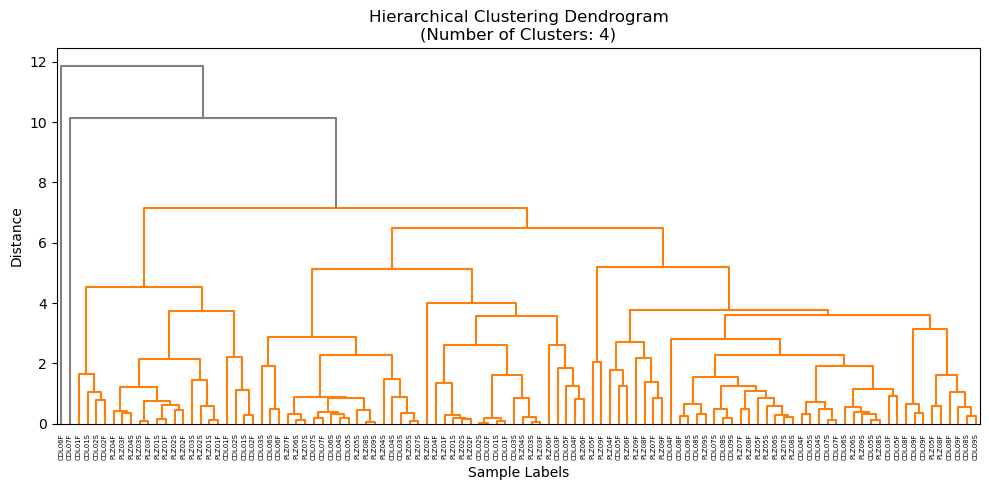

In [38]:
def preprocess_data(df, variables):
    df_clean = df.dropna(subset=variables)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean[variables])
    return df_clean, X_scaled
def perform_hierarchical_clustering(X_scaled, method='complete', n_clusters=4):
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4):
    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix,labels=labels,above_threshold_color='gray')
    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()
    # Main workflow
# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']
# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(cluster_df, selected_vars)
# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=4)
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters
# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)

- **Average**

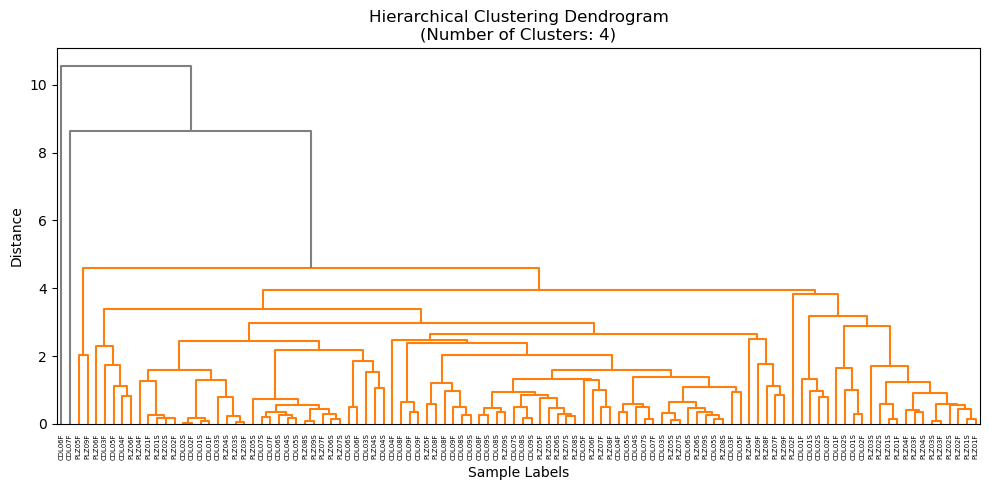

In [39]:
def preprocess_data(df, variables):
    df_clean = df.dropna(subset=variables)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean[variables])
    return df_clean, X_scaled
def perform_hierarchical_clustering(X_scaled, method='average', n_clusters=4):
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4):
    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix,labels=labels,above_threshold_color='gray')
    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()
    # Main workflow
# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']
# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(cluster_df, selected_vars)
# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=4)
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters
# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)